## Script is designed to create the taxonomy table file

Output is: <br>

1. <i> File "Tax_gtdb.csv" <br></i>
Taxonomy table file. Taxonomy was taken from last GTDB release (release207/207.0) <br>
https://data.ace.uq.edu.au/public/gtdb/data/releases/release207/207.0/ <br>
<br>
2. <i> File "Tax_gtdb-ncbi.csv" <br></i>
Taxonomy table file. The table includes the gtdb taxonomy and ncbi names for all species for which I find a correspondence between dtdb and ncbi spesies names. Gtdb species names vs ncbi species names match files were taken from here: <br>
https://data.gtdb.ecogenomic.org/releases/latest/auxillary_files/


In [114]:
# import packages
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3
import pandas as pd
import seaborn as sns 
import os
import glob
import plotly.express as px
import numpy as np

## Tax_gtdb

In [77]:
colnames = ['dom','phylum','class','order','family','genus','sp']

bac = pd.read_csv('input/bac120_taxonomy_r207.tsv', sep=';', names=colnames, header=None)
arh = pd.read_csv('input/ar53_taxonomy_r207.tsv', sep=';', names=colnames, header=None)

# modify bac120 table
bac['domain'] = bac['dom'].str.split('__', expand=True)[1]
bac['phylum'] = bac['phylum'].str.replace(r'p__', '')
bac['class'] = bac['class'].str.replace(r'c__', '')
bac['order'] = bac['order'].str.replace(r'o__', '')
bac['family'] = bac['family'].str.replace(r'f__', '')
bac['genus'] = bac['genus'].str.replace(r'g__', '')
bac['sp'] = bac['sp'].str.replace(r's__', '')
bac = bac[['domain','phylum','class','order','family','genus','sp']]
bac = bac.drop_duplicates()

# modify arch table
arh['domain'] = arh['dom'].str.split('__', expand=True)[1]
arh['phylum'] = arh['phylum'].str.replace(r'p__', '')
arh['class'] = arh['class'].str.replace(r'c__', '')
arh['order'] = arh['order'].str.replace(r'o__', '')
arh['family'] = arh['family'].str.replace(r'f__', '')
arh['genus'] = arh['genus'].str.replace(r'g__', '')
arh['sp'] = arh['sp'].str.replace(r's__', '')
arh = arh[['domain','phylum','class','order','family','genus','sp']]
arh = arh.drop_duplicates()

frames = [bac,arh]
gtdb = pd.concat(frames)

gtdb.to_csv('Tax_gtdb.csv', index=False)
gtdb.head(2)

,domain,phylum,class,order,family,genus,sp
0,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,Escherichia coli
26859,Bacteria,Firmicutes,Bacilli,Staphylococcales,Staphylococcaceae,Staphylococcus,Staphylococcus aureus


## Tax_gtdb-ncbi

In [68]:
convB = pd.read_excel('input/gtdb_vs_ncbi_bacteria.xlsx', sheet_name='Species')

convB['top_sp_ncbi'] = convB['List of NCBI species'].str.split(',', expand=True)[0]
convB['GTDB R207 species'] = convB['GTDB R207 species'].str.replace(r's__', '')
convB['top_sp_ncbi'] = convB['top_sp_ncbi'].str.replace(r's__', '')
convB.rename(columns = {'GTDB R207 species':'sp_gtdb'}, inplace = True)
new = convB.top_sp_ncbi.str.rsplit(' ', 1, expand=True)\
  .rename(columns=lambda x: 'col{}'.format(x + 1))
convB['sp_ncbi'] = new['col1']

convB = convB[['sp_gtdb','sp_ncbi']]
convB = convB.loc[convB['sp_ncbi'] != "(g__)"]

convB.head(2)

,sp_gtdb,sp_ncbi
0,Escherichia coli,Escherichia coli
1,Staphylococcus aureus,Staphylococcus aureus


In [69]:
convA = pd.read_excel('input/gtdb_vs_ncbi_r207_archaea.xlsx', sheet_name='Species')

convA['top_sp_ncbi'] = convA['List of NCBI species'].str.split(',', expand=True)[0]
convA['GTDB R207 species'] = convA['GTDB R207 species'].str.replace(r's__', '')
convA['top_sp_ncbi'] = convA['top_sp_ncbi'].str.replace(r's__', '')
convA.rename(columns = {'GTDB R207 species':'sp_gtdb'}, inplace = True)
new = convA.top_sp_ncbi.str.rsplit(' ', 1, expand=True)\
  .rename(columns=lambda x: 'col{}'.format(x + 1))
convA['sp_ncbi'] = new['col1']

convA = convA[['sp_gtdb','sp_ncbi']]
convA = convA.loc[convA['sp_ncbi'] != "(g__)"]

convA.head(2)

,sp_gtdb,sp_ncbi
0,Methanosarcina mazei,Methanosarcina mazei
4,Saccharolobus islandicus,Sulfolobus islandicus


In [70]:
frames = [convA,convB]
conv = pd.concat(frames)

In [102]:
gtdbN = pd.merge(gtdb, conv, how="inner", left_on="sp", right_on='sp_gtdb').sort_values('sp_ncbi')
gtbdN.to_csv('Tax_gtdb-ncbi.csv', index=False)
gtdbN.head(2)

,domain,phylum,class,order,family,genus,sp,sp_gtdb,sp_ncbi
3769,Bacteria,Proteobacteria,Gammaproteobacteria,Nevskiales,OUC007,Abyssibacter,Abyssibacter profundi,Abyssibacter profundi,Abyssibacter profundi
6092,Bacteria,Cyanobacteria,Cyanobacteriia,Thermosynechococcales,Thermosynechococcaceae,Acaryochloris,Acaryochloris marina_A,Acaryochloris marina_A,Acaryochloris marina


## Stats

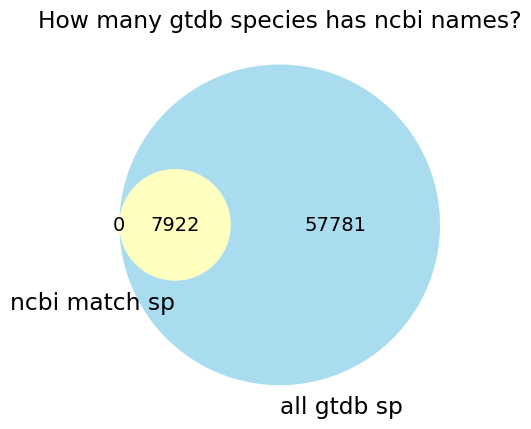

In [136]:
from matplotlib.pyplot import figure
figure(figsize=(5, 5), dpi=100)
plt.rcParams.update({'font.size': 14})

venn2([set(conv['sp_gtdb'].to_list()), 
       set(gtdb['sp'].to_list())],
       set_labels=('ncbi match sp', 'all gtdb sp'), 
       set_colors=('orange', 'skyblue'), alpha = 0.7)

plt.title('How many gtdb species has ncbi names?')
plt.savefig('gtdb_nacbi_matches.png')

In [133]:
gtdbC = gtdbN
gtdbC['comp'] = np.where(gtdbC['sp_gtdb'] != gtdbC['sp_ncbi'], 'different sp name', 'same sp name')
gtdbC['comp'].value_counts()

different sp name    6364
same sp name         1558
Name: comp, dtype: int64

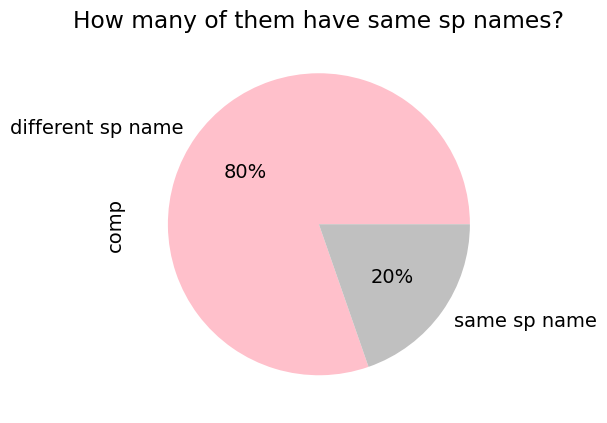

In [135]:
figure(figsize=(5, 5), dpi=100)
df.plot.pie(y='mass', figsize=(5, 5), autopct='%1.0f%%', colors=['pink', 'silver'])
plt.title('How many of them have same sp names?')

plt.savefig('Same_names.png')